# **Smart Farming Optimization Engine**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


{'Crop_recommendation.csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627178,241.9741949,rice\r\n89,54,38,24.51588066,83.5352163,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,rice\r\n94,50,37,25.66585

In [3]:
crop_dataset = pd.read_csv('Crop_recommendation.csv')
crop_dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crop_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop_dataset.shape

(2200, 8)

In [6]:
crop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop_dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
crop_dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [68]:
crop_dataset.groupby('label').mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [69]:
X = crop_dataset.drop(columns = 'label', axis = 1)
Y = crop_dataset['label']

In [70]:
print(X)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [71]:
print(Y)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


**Visualize the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


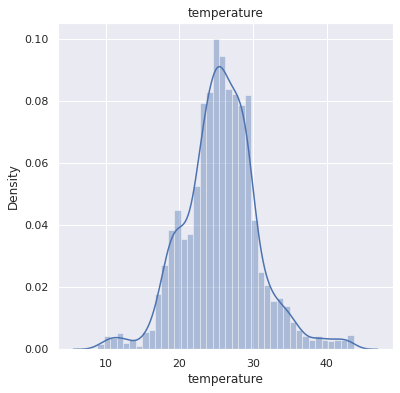

In [72]:
# temperature
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(crop_dataset['temperature'])
plt.title('temperature')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


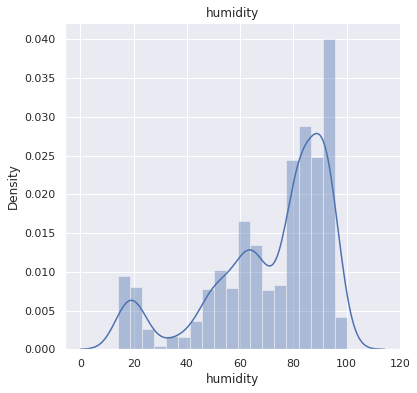

In [73]:
# temperature
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(crop_dataset['humidity'])
plt.title('humidity')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


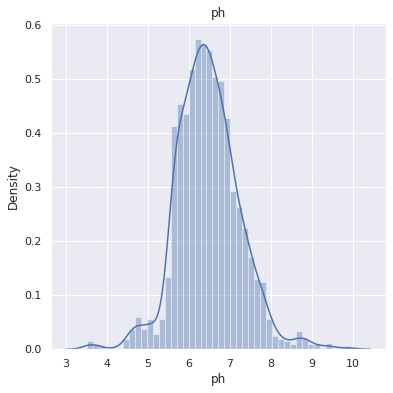

In [74]:
# temperature
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(crop_dataset['ph'])
plt.title('ph')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


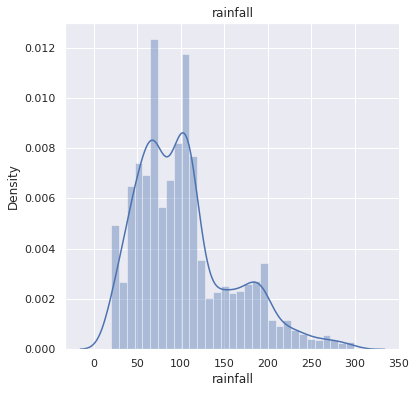

In [75]:
# temperature
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(crop_dataset['rainfall'])
plt.title('rainfall')
plt.show()

**Training and Testing Data**

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [77]:
print(X.shape, X_train.shape, X_test.shape)

(2200, 7) (1980, 7) (220, 7)


In [78]:
print(X_train)

        N    P    K  temperature   humidity        ph    rainfall
1795   42   59   55    40.102077  94.351102  6.979102  149.119999
322    22   70   19    18.237757  21.076433  5.515615   69.449516
944    37   11   36    24.247796  85.560333  6.710143  106.921603
2185  116   36   25    27.578476  58.525343  6.172090  156.681037
742    28   68   19    34.638810  61.385979  7.699507   72.431691
...   ...  ...  ...          ...        ...       ...         ...
1066  103   72   51    26.126434  81.813650  6.099479  104.481286
1246    4  134  200    28.578288  80.956290  5.840256   73.342321
1838   30   25   31    26.312706  98.620480  5.804965  208.118138
1562    6  124  200    22.982081  93.845050  5.971332  109.585225
656     2   38   18    27.536329  89.929082  6.619891   45.485919

[1980 rows x 7 columns]


In [79]:
print(Y_train)

1795         papaya
322     kidneybeans
944     pomegranate
2185         coffee
742       blackgram
           ...     
1066         banana
1246         grapes
1838        coconut
1562          apple
656        mungbean
Name: label, Length: 1980, dtype: object


**Model Training using Logistic Regression**

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X_train, Y_train)
LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Model Evaluation**

In [82]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [83]:
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 0.9681818181818181


In [84]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [85]:
print('accuracy on test data:', test_data_accuracy)

accuracy on test data: 0.9681818181818181


In [87]:
input_data = (90,42,43,20.87974371,82.00274423,6.502985292,202.9355362)
# changing input data to numpy array
input_data_as_numpy_array = np.array(input_data)
# reshape the np array as we are predicting for 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print('The crop predicted for the given input is ', prediction)




The crop predicted for the given input is  ['rice']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
